# Where to open a new coffee shop?

## 📖 Background
You are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver. 

Your client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.
 
Your team collected geographical and demographic information about Denver's neighborhoods to assist the search. They also collected data for Starbucks stores in Denver. Starbucks and the new coffee shops do not compete for the same clients; the team included their location as a reference.

## 💾 The data
You have assembled information from three different sources ([locations](https://github.com/chrismeller/), [neighborhoods](http://data.denvergov.org), [demographics](https://www.census.gov/)):

#### Starbucks locations in Denver, Colorado
- "StoreNumber" - Store Number as assigned by Starbucks
- "Name" - Name identifier for the store
- "PhoneNumber" - Phone number for the store
- "Street 1, 2, and 3" - Address for the store
- "PostalCode" - Zip code of the store
- "Longitude, Latitude" - Coordinates of the store

#### Neighborhoods' geographical information
- "NBHD_ID" - Neighborhood ID (matches the census information)
- "NBHD_NAME" - Name of the statistical neighborhood
- "Geometry" - Polygon that defines the neighborhood

#### Demographic information
- "NBHD_ID" - Neighborhood ID (matches the geographical information)
- "NBHD_NAME' - Nieghborhood name
- "POPULATION_2010' - Population in 2010
- "AGE_ " - Number of people in each age bracket (< 18, 18-34, 35-65, and > 65)
- "NUM_HOUSEHOLDS" - Number of households in the neighborhood
- "FAMILIES" - Number of families in the neighborhood
- "NUM_HHLD_100K+" - Number of households with income above 100 thousand USD per year

_Starbucks locations were scrapped from the Starbucks store locator webpage by [Chris Meller](https://github.com/chrismeller/)._  
_Statistical Neighborhood information from the [City of Denver Open Data Catalog](http://data.denvergov.org), [CC BY 3.0](http://creativecommons.org/licenses/by/3.0/) license._      
_Census information from the [United States Census Bureau](https://www.census.gov/). Publicly available information._

In [2]:
%%capture
pip install geopandas

In [44]:
import pandas as pd
import geopandas as gpd
denver = pd.read_csv('./data/denver.csv')
denver

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77
...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65


In [45]:
neighborhoods = gpd.read_file('./data/neighborhoods.shp')
neighborhoods

,NBHD_ID,NBHD_NAME,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."
...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7..."
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7..."
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7..."
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7..."


In [46]:
census = pd.read_csv('./data/census.csv')
census

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN
...,...,...,...,...,...,...,...,...,...,...
73,74,West Colfax,9740.0,2756.0,2935.0,3111.0,938.0,3703.0,1971.0,431.0
74,75,West Highland,8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.0
75,76,Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0
76,77,Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN


## 💪 Challenge
Provide your client a list of neighborhoods in Denver where they should consider expanding. Include:
* A visualization of Denver's neighborhoods and the Starbucks store locations.
* Find the neighborhoods with the highest proportion of people in the target demographic.
* Select the top three neighborhoods where your client should focus their search.

### Note: 

To ensure the best user experience, we currently discourage using Folium and Bokeh in Workspace notebooks.

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your work.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

## Visualize the Starbucks locations in Denver, CO.

In [47]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

The Starbucks locations are plotted as a scatter plot. The Denver neighborhoods are colored inside the polygons. 

<Figure size 7000x5000 with 0 Axes>

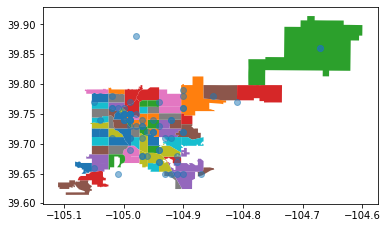

In [48]:
figure(figsize=(70,50), dpi=100) # Increase the resolution of the map
neighborhoods.plot(column='NBHD_NAME') # To visualtize the legend use legend=True
plt.scatter(x=denver['Longitude'], y=denver['Latitude'], marker='o', alpha=0.5)
plt.show()

Lets annotate the names of the each starbucks store in Denver 

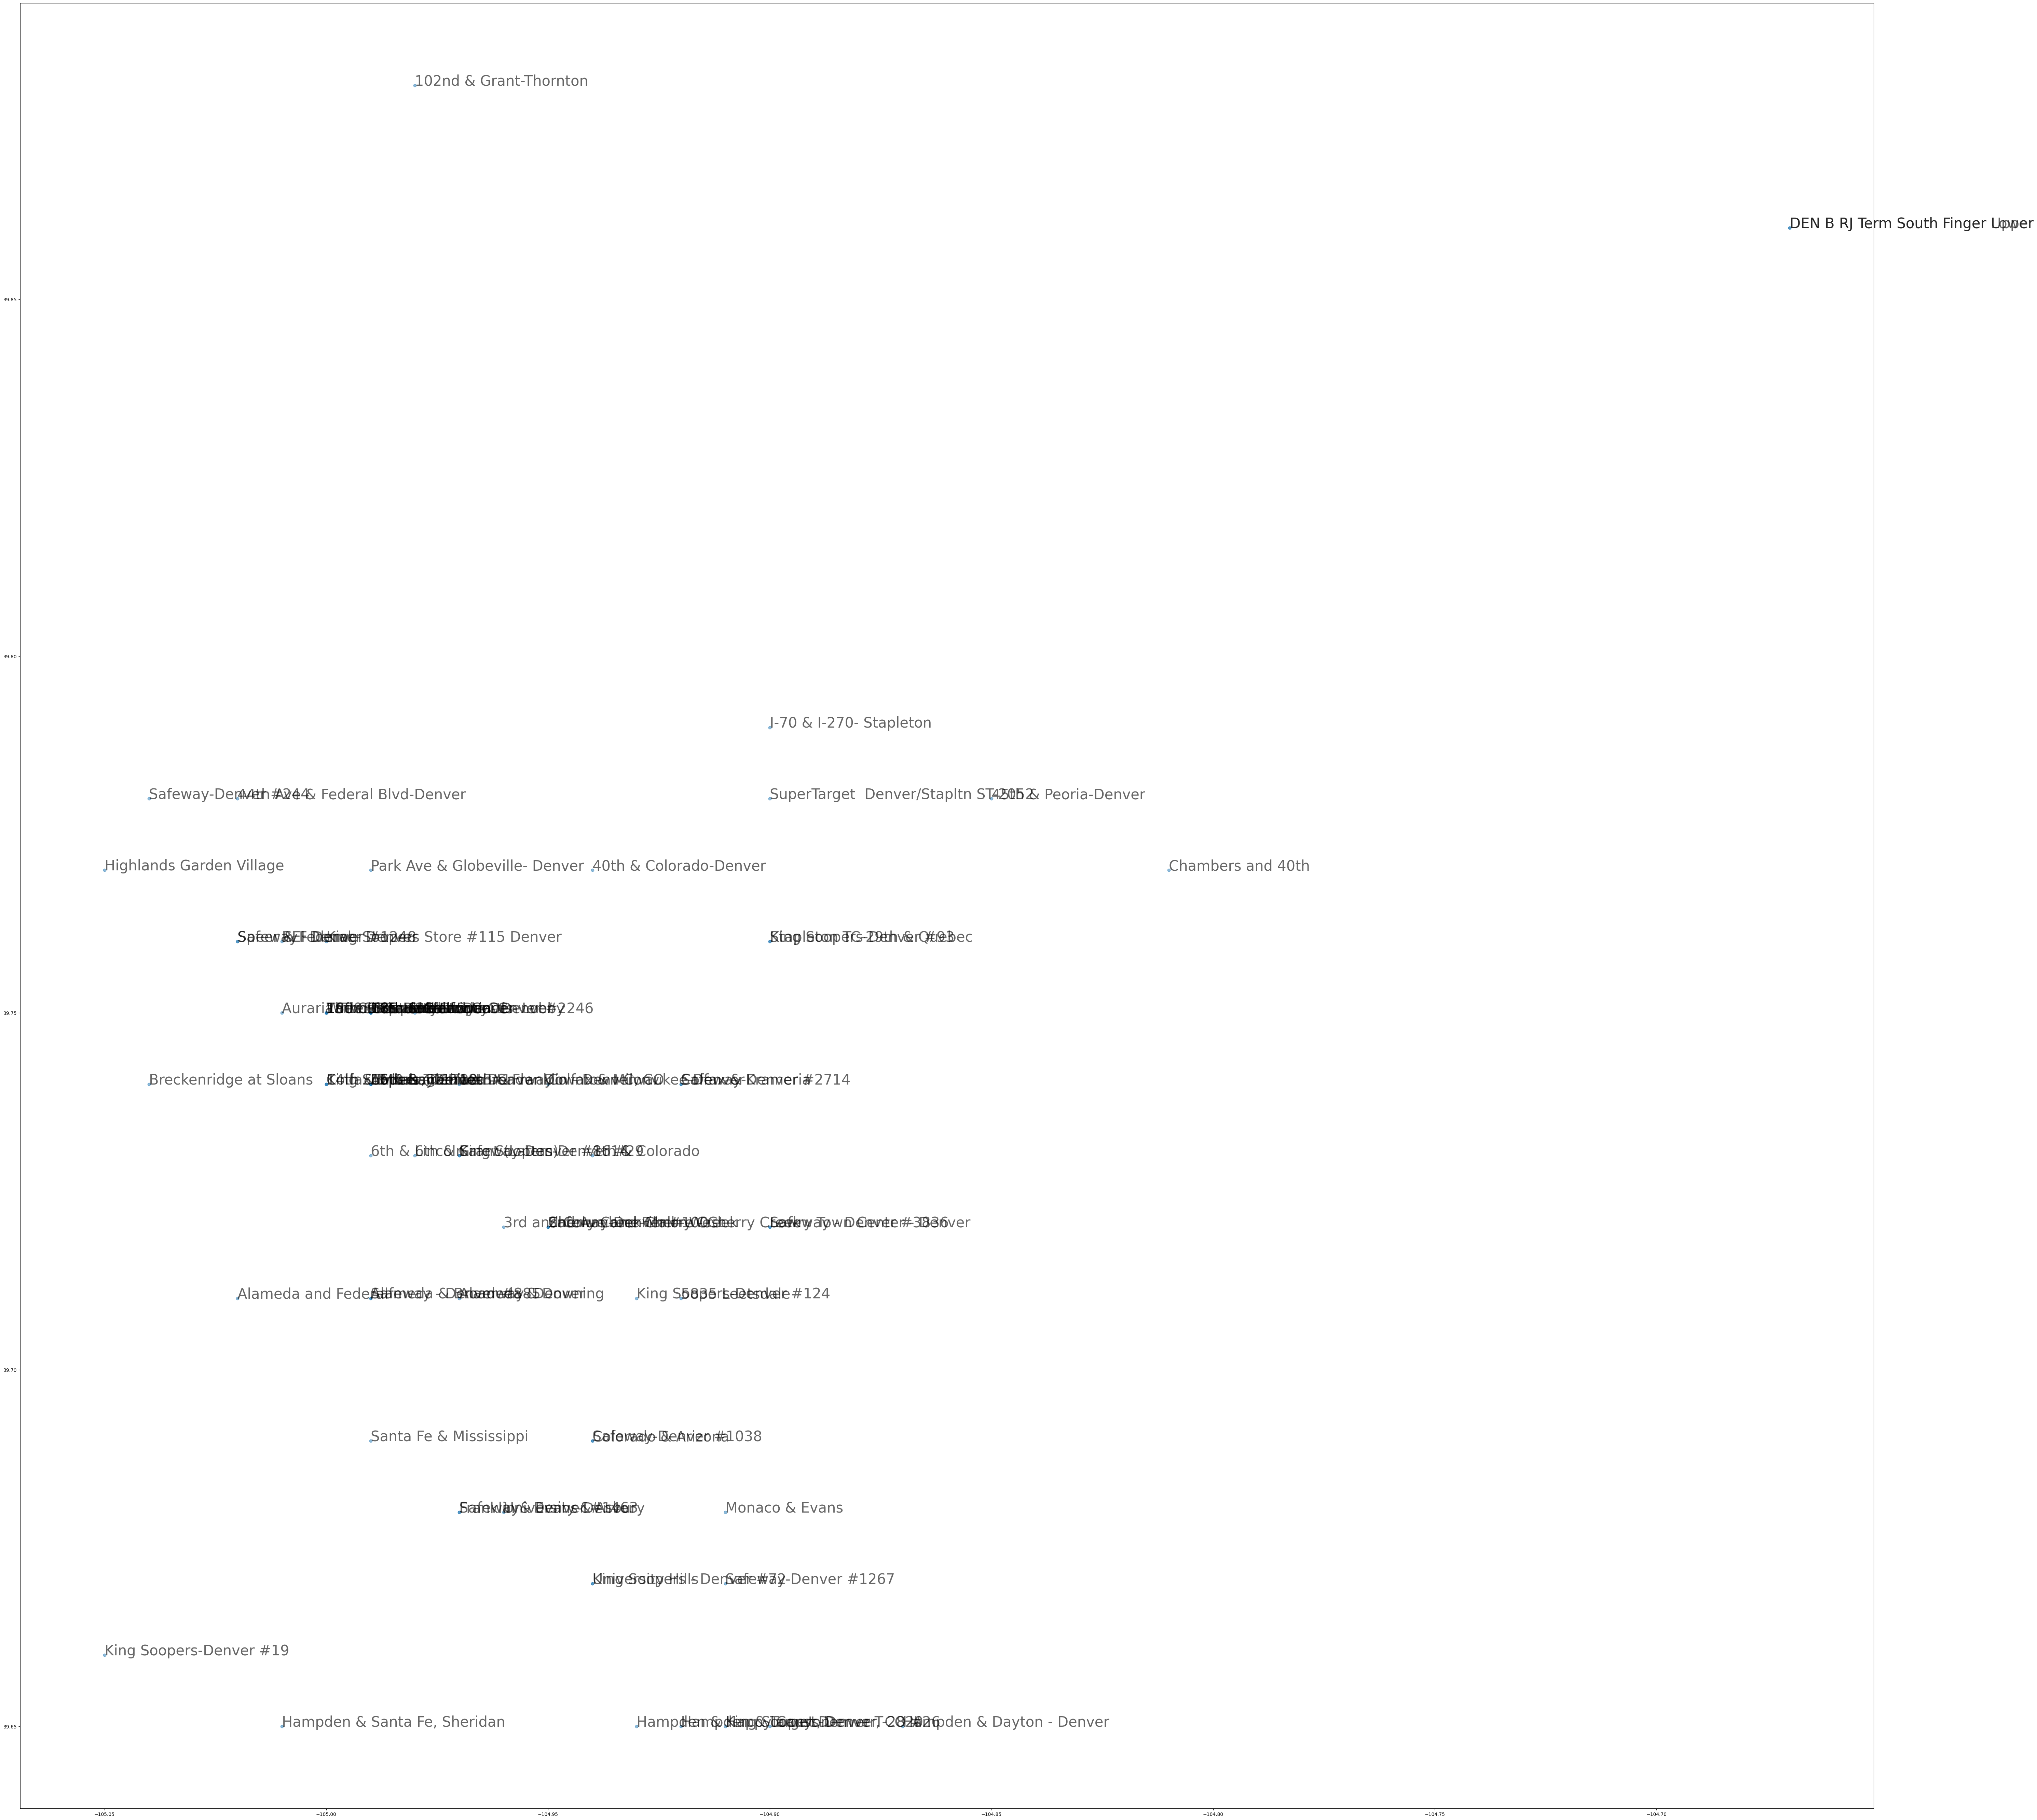

In [49]:
xs=denver['Longitude']
ys=denver['Latitude']
figure(figsize=(70,70), dpi=100)
plt.scatter(x=xs, y=ys, marker='o', alpha=0.5)
for x, y, store in zip(xs, ys, denver['Name']):
    plt.annotate(store, (x, y), fontsize=30, alpha=0.6)

# Data Wrangling 

Before we start analyzing the demographic information from the census data set we first try to understand the data set. For this we shall first use describe method and then try to find missing values and clean the data set.

We first analyze the census data set. Then we analyze the neighborhoods data set.

## Census data set

### Description of data set

In [50]:
census.describe()

,NBHD_ID,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,48.000000
mean,39.500000,7694.333333,1650.846154,2375.358974,2871.564103,796.564103,3373.166667,1602.615385,1095.208333
std,22.660538,5166.830998,1778.296281,1657.967783,1831.507495,617.881773,2145.793889,1183.566251,650.866197
min,1.000000,705.000000,7.000000,360.000000,57.000000,6.000000,60.000000,15.000000,120.000000
25%,20.250000,4213.000000,680.750000,1307.250000,1514.000000,404.000000,1773.750000,855.000000,439.250000
50%,39.500000,6701.500000,1300.000000,1984.000000,2594.000000,665.500000,3086.000000,1290.000000,1043.500000
75%,58.750000,9640.000000,2150.500000,3090.500000,3667.000000,987.000000,3985.750000,2095.000000,1680.000000
max,78.000000,30348.000000,11137.000000,8274.000000,10405.000000,3383.000000,10856.000000,7056.000000,2748.000000


In [51]:
census.shape

(78, 10)

In [52]:
census.dtypes

NBHD_ID              int64
NBHD_NAME           object
POPULATION_2010    float64
AGE_LESS_18        float64
AGE_18_TO_34       float64
AGE_35_TO_65       float64
AGE_65_PLUS        float64
NUM_HOUSEHOLDS     float64
FAMILIES           float64
NUM_HHLD_100K+     float64
dtype: object

### Missing data
Before we start analysing the data set we first need to find whether there are any missing data present in the data set

In [53]:
census.isna().sum()

NBHD_ID             0
NBHD_NAME           0
POPULATION_2010     0
AGE_LESS_18         0
AGE_18_TO_34        0
AGE_35_TO_65        0
AGE_65_PLUS         0
NUM_HOUSEHOLDS      0
FAMILIES            0
NUM_HHLD_100K+     30
dtype: int64

There are 30 missing values in the NUM_HHLD_100K+ column. This column represent the number of households that has income more than 100k. We can reasonably assume that the missing data is equal to the mean of the number of families that has income +100K in the same area. The other option is setting these missing values to be zero.

For the following analysis we choose to fill the null by mean

In [56]:
census = census.fillna(census['NUM_HHLD_100K+'].mean())
census

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.000000
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,1095.208333
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,1095.208333
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.000000
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,1095.208333
...,...,...,...,...,...,...,...,...,...,...
73,74,West Colfax,9740.0,2756.0,2935.0,3111.0,938.0,3703.0,1971.0,431.000000
74,75,West Highland,8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.000000
75,76,Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.000000
76,77,Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,1095.208333


### Check for duplicated values

In [55]:
duplicates = census.duplicated()
print(duplicates)

0     False
1     False
2     False
3     False
4     False
      ...  
73    False
74    False
75    False
76    False
77    False
Length: 78, dtype: bool


We do not see any duplicated values, which is good!

## Neighborhoods data set

We fist check for missing values and duplicated values as usual

In [58]:
neighborhoods.dtypes

NBHD_ID         int64
NBHD_NAME      object
geometry     geometry
dtype: object

In [59]:
neighborhoods.isna().sum()

NBHD_ID      0
NBHD_NAME    0
geometry     0
dtype: int64

In [61]:
duplicates = neighborhoods.duplicated()
duplicates

0     False
1     False
2     False
3     False
4     False
      ...  
73    False
74    False
75    False
76    False
77    False
Length: 78, dtype: bool

In this data set we do not observe any missing values and duplicate values.

## Merging the census and neighborhoods data sets together 

To merge data sets we use inner join using 'NBHD_ID' column of both data sets

In [62]:
neighborhoods_census = neighborhoods.merge(census, on='NBHD_ID', suffixes=('_nbh', '_cen'))

In [63]:
print(neighborhoods_census.head())

   NBHD_ID         NBHD_NAME_nbh  \
0        2               Auraria   
1       21        Cory - Merrill   
2        7               Belcaro   
3       70       Washington Park   
4       71  Washington Park West   

                                            geometry         NBHD_NAME_cen  \
0  POLYGON ((-105.00042 39.74552, -105.00041 39.7...               Auraria   
1  POLYGON ((-104.94070 39.69540, -104.94070 39.6...        Cory - Merrill   
2  POLYGON ((-104.94070 39.71156, -104.94069 39.7...               Belcaro   
3  POLYGON ((-104.95931 39.71566, -104.95931 39.7...       Washington Park   
4  POLYGON ((-104.97342 39.68982, -104.97356 39.6...  Washington Park West   

   POPULATION_2010  AGE_LESS_18  AGE_18_TO_34  AGE_35_TO_65  AGE_65_PLUS  \
0            705.0          7.0         635.0          57.0          6.0   
1           3892.0        763.0         906.0        1742.0        481.0   
2           4172.0        646.0         621.0        1913.0        992.0   
3         

In [65]:
print(neighborhoods_census.shape)

(78, 12)


# Visualization of demographic data

The client's target demographic is age 20-35. In the census we have data for the age group 18-34. For the rest of the analysis we use the 18-34 group as the target group. 

In the following plot we visualize the distribution of the target group among the Denver neighborhoods. 

<Figure size 7000x5000 with 0 Axes>

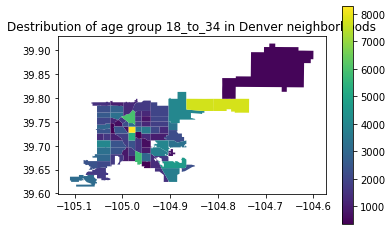

In [68]:
figure(figsize=(70,50), dpi=100) # Increase the resolution of the map
neighborhoods_census.plot(column='AGE_18_TO_34', legend=True) # To visualtize the legend use legend=True
plt.title('Destribution of age group 18_to_34 in Denver neighborhoods')
plt.show()

Let us subset our merged data set to the top 3 of highest proportion of people in the target demographic

In [71]:
largest_target_pop = neighborhoods_census.nlargest(3, 'AGE_18_TO_34')
largest_target_pop

,NBHD_ID,NBHD_NAME_nbh,geometry,NBHD_NAME_cen,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
45,9,Capitol Hill,"POLYGON ((-104.97341 39.74003, -104.97299 39.7...",Capitol Hill,14708.0,408.0,8274.0,5155.0,871.0,10856.0,1201.0,1223.0
53,28,Gateway - Green Valley Ranch,"POLYGON ((-104.80990 39.77283, -104.80988 39.7...",Gateway - Green Valley Ranch,29201.0,10074.0,7778.0,10405.0,944.0,9427.0,7056.0,2192.0
51,45,Montbello,"POLYGON ((-104.80990 39.77283, -104.81925 39.7...",Montbello,30348.0,11137.0,7742.0,9561.0,1908.0,7942.0,6399.0,939.0


## Where should client search for coffee shop?

To address this question we use the subsetted data set so that we only focus on neighborhoods with largest 18-34 population.

However, to minimize the competition with the Starbucks we shall consider the Starbucks locations relative to these neighborhoods.

<Figure size 7000x5000 with 0 Axes>

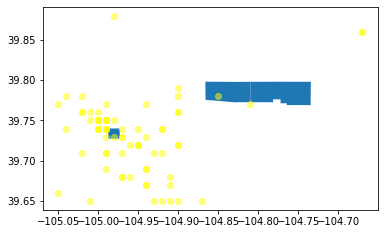

In [73]:
figure(figsize=(70,50), dpi=100) # Increase the resolution of the map
largest_target_pop.plot() # To visualtize the legend use legend=True
plt.scatter(x=denver['Longitude'], y=denver['Latitude'], marker='o', c='yellow', alpha=0.5)
plt.show()

Out of top three neighborhoods we do not recommend 'Capitol Hill'. Currently, this neighborhood have a couple of Starbucks. Target population is 8274. If this location is chosen then there will be high competition. Following is the geographic map.

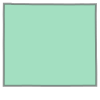

In [93]:
largest_target_pop.iloc[0,2]

However, we recommend 'Gateway - Green Valley Ranch'. Currently, this neighborhood only have one Starbucks shop. Target population is 7778. Following is the geographic map.

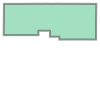

In [92]:
largest_target_pop.iloc[1,2]

Next we recommend 'Montbello'. Out of top three choices this neighborhood is the by far best location. This is because currently there are no Starbucks located in this neighborhood. Also, this neighborhood has the largest population. The target population is 7742. Following is the geographic map.

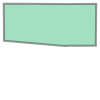

In [94]:
largest_target_pop.iloc[2,2]